## Using LSTM to predict closing price

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [2]:
dataset=pd.read_csv('STOCK_INDEX.csv')

In [3]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0.0
1,2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0.0
2,2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0.0
3,2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0.0
4,2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0.0
...,...,...,...,...,...,...,...
2689,2021-04-26,14449.450200,14557.500000,14421.299810,14485.000000,14485.000000,452700.0
2690,2021-04-27,14493.799810,14667.549810,14484.849610,14653.049810,14653.049810,451800.0
2691,2021-04-28,14710.500000,14890.250000,14694.950200,14864.549810,14864.549810,457000.0
2692,2021-04-29,14979.000000,15044.349610,14814.450200,14894.900390,14894.900390,517500.0


In [4]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2.667000e+03
mean,8269.195149,8312.379344,8211.006332,8261.834986,8261.834986,2.178558e+05
std,2585.209169,2592.927841,2568.153153,2581.268450,2581.268450,2.291874e+05
min,4623.149902,4623.149902,4531.149902,4544.200195,4544.200195,0.000000e+00
25%,5815.699951,5855.649902,5764.375000,5817.650147,5817.650147,0.000000e+00
50%,8132.950195,8180.200195,8089.399902,8129.350098,8129.350098,1.662000e+05
75%,10481.300295,10534.850100,10415.774905,10471.750000,10471.750000,2.771000e+05
max,15371.450200,15431.750000,15243.400390,15314.700200,15314.700200,1.811000e+06


In [5]:
dataset = dataset.interpolate(method='cubic', limit_direction='both')

In [6]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0.0
1,2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0.0
2,2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0.0
3,2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0.0
4,2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0.0
...,...,...,...,...,...,...,...
2689,2021-04-26,14449.450200,14557.500000,14421.299810,14485.000000,14485.000000,452700.0
2690,2021-04-27,14493.799810,14667.549810,14484.849610,14653.049810,14653.049810,451800.0
2691,2021-04-28,14710.500000,14890.250000,14694.950200,14864.549810,14864.549810,457000.0
2692,2021-04-29,14979.000000,15044.349610,14814.450200,14894.900390,14894.900390,517500.0


In [7]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2.694000e+03
mean,8256.604587,8299.720354,8198.427113,8249.229115,8249.229115,2.170559e+05
std,2585.415766,2593.186790,2568.459281,2581.652997,2581.652997,2.292163e+05
min,4623.149902,4623.149902,4531.149902,4544.200195,4544.200195,-4.411339e-03
25%,5803.624878,5845.687622,5750.112671,5797.612426,5797.612426,0.000000e+00
50%,8125.175049,8169.250000,8082.550049,8125.675049,8125.675049,1.655000e+05
75%,10475.212890,10524.100098,10409.112793,10459.737305,10459.737305,2.750500e+05
max,15371.450200,15431.750000,15243.400390,15314.700200,15314.700200,1.811000e+06


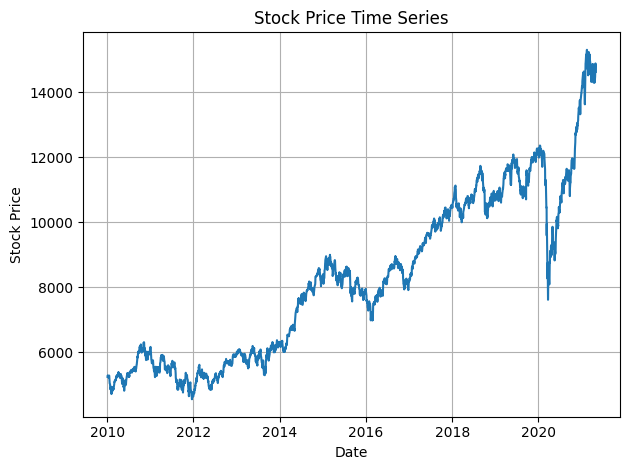

In [8]:
import matplotlib.pyplot as plt
dataset['Date'] = pd.to_datetime(dataset['Date'])
plt.plot(dataset['Date'], dataset['Close'])
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Time Series')
plt.grid(True)
plt.tight_layout()
plt.show()

### Here I am using only closing price to train the LSTM neural network

In [9]:
import math
data=dataset.filter(['Close'])
new_data=data.values   #new_data is a numpy array here
training_data_len=math.ceil(len(new_data)*0.8) # Using 80% data for training 
training_data_len

2156

In [10]:
#Scaling our data before presenting it to the neural network as it can improve the performance of the model.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(new_data)

In [11]:
scaled_data #Here our data is converted between 0 and 1 both inclusive  

array([[0.06387819],
       [0.06812123],
       [0.06848332],
       ...,
       [0.95820525],
       [0.96102318],
       [0.93653028]])

In [12]:
train_data=scaled_data[0:training_data_len,:] 

In [13]:
x_train=[]
y_train=[]
# Here we are using past 30 days scaled stock price data as x_train and 31st day data as y_train 
for i in range(50,len(train_data)):
    x_train.append(train_data[i-50:i,0])
    y_train.append(train_data[i,0])
    if i<=51:
        print(x_train)
        print(y_train)
        print()

[array([0.06387819, 0.06812123, 0.06848332, 0.06674712, 0.06504339,
       0.06547511, 0.06185411, 0.06404067, 0.06645   , 0.06573511,
       0.06783807, 0.06327002, 0.0629033 , 0.05106074, 0.04566174,
       0.04305276, 0.02868018, 0.02999395, 0.03136805, 0.03300682,
       0.02654472, 0.03599182, 0.02796062, 0.01619699, 0.01488738,
       0.02007332, 0.02306761, 0.01977624, 0.02624297, 0.02393111,
       0.02892622, 0.03433451, 0.03189729, 0.02791883, 0.02898656,
       0.0302539 , 0.02919084, 0.0292976 , 0.03510511, 0.04389767,
       0.05049904, 0.04977019, 0.05055476, 0.05383221, 0.05174317,
       0.05311265, 0.05470495, 0.05503921, 0.05428715, 0.06071212])]
[0.06671924327249462]

[array([0.06387819, 0.06812123, 0.06848332, 0.06674712, 0.06504339,
       0.06547511, 0.06185411, 0.06404067, 0.06645   , 0.06573511,
       0.06783807, 0.06327002, 0.0629033 , 0.05106074, 0.04566174,
       0.04305276, 0.02868018, 0.02999395, 0.03136805, 0.03300682,
       0.02654472, 0.03599182, 0.02

In [14]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [15]:
x_train.shape

(2106, 50)

In [16]:
#Reshaping as LSTM neural network requires a 3D input as->{Number of samples,Number of Steps,Number of features} 
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2106, 50, 1)

In [353]:
model=Sequential()
model.add(LSTM(16,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(16))
model.add(Dense(4))
model.add(Dense(2))

In [354]:
tf.random.set_seed(42)

In [373]:
from tensorflow import keras
optimizer = keras.optimizers.Adam(learning_rate=0.053)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [374]:
model.fit(x_train,y_train,batch_size=500,epochs=50)

Epoch 1/50
5/5 [==============================] - 3s 53ms/step - loss: 0.1304
Epoch 2/50
5/5 [==============================] - 0s 51ms/step - loss: 0.0203
Epoch 3/50
5/5 [==============================] - 0s 52ms/step - loss: 0.0092
Epoch 4/50
5/5 [==============================] - 0s 55ms/step - loss: 0.0053
Epoch 5/50
5/5 [==============================] - 0s 52ms/step - loss: 0.0016
Epoch 6/50
5/5 [==============================] - 0s 51ms/step - loss: 9.8523e-04
Epoch 7/50
5/5 [==============================] - 0s 52ms/step - loss: 6.3060e-04
Epoch 8/50
5/5 [==============================] - 0s 52ms/step - loss: 4.4725e-04
Epoch 9/50
5/5 [==============================] - 0s 51ms/step - loss: 2.6680e-04
Epoch 10/50
5/5 [==============================] - 0s 54ms/step - loss: 1.9178e-04
Epoch 11/50
5/5 [==============================] - 0s 53ms/step - loss: 1.6331e-04
Epoch 12/50
5/5 [==============================] - 0s 52ms/step - loss: 1.3638e-04
Epoch 13/50
5/5 [================

In [375]:
#Training done and now we are creating a testing data
test_data=scaled_data[training_data_len-50:,:]

In [376]:
x_test=[]
y_test=new_data[training_data_len:,:]
for i in range(50,len(test_data)):
    x_test.append(test_data[i-50:i,0])

In [377]:
x_test=np.array(x_test)

In [378]:
x_test.shape

(538, 50)

In [379]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [380]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
predictions

17/17 [==============================] - 1s 8ms/step


array([[10981.477, 10999.185],
       [10953.372, 10993.226],
       [10921.758, 10959.86 ],
       ...,
       [13958.424, 13928.256],
       [14043.192, 13994.154],
       [14112.123, 14061.685]], dtype=float32)

In [381]:
y_test

array([[10831.5       ],
       [10849.79981   ],
       [10780.54981   ],
       [10661.54981   ],
       [10652.2002    ],
       [10651.79981   ],
       [10830.9502    ],
       [10893.65039   ],
       [10912.25      ],
       [10934.34961   ],
       [11062.4502    ],
       [11069.40039   ],
       [10943.59961   ],
       [10888.79981   ],
       [10831.40039   ],
       [10746.04981   ],
       [10724.40039   ],
       [10640.9502    ],
       [10604.34961   ],
       [10735.4502    ],
       [10789.84961   ],
       [10791.65039   ],
       [10880.09961   ],
       [10835.29981   ],
       [10806.65039   ],
       [10792.5       ],
       [10863.5       ],
       [10987.4502    ],
       [11053.        ],
       [11058.2002    ],
       [11035.40039   ],
       [11168.04981   ],
       [11301.2002    ],
       [11341.7002    ],
       [11343.25      ],
       [11426.84961   ],
       [11462.2002    ],
       [11532.40039   ],
       [11521.04981   ],
       [11456.90039   ],


In [382]:
mse = np.mean((predictions - y_test) ** 2)
mse

107972.22496271464

C:\Users\rs725\AppData\Local\Temp\ipykernel_21028\447782185.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predicted_Close'] = predictions[:, 0]
C:\Users\rs725\AppData\Local\Temp\ipykernel_21028\447782185.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predicted_Next_Day_Close'] = predictions[:, 1]


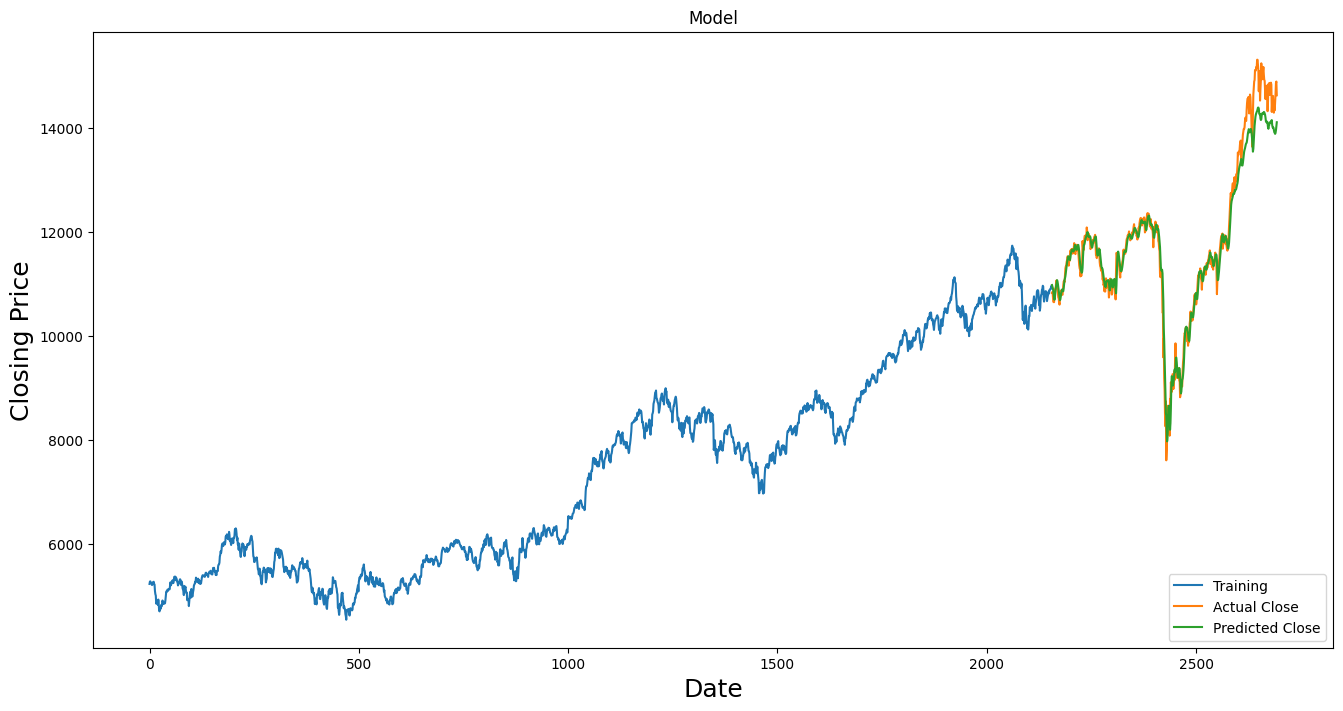

In [383]:
import matplotlib.pyplot as plt

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predicted_Close'] = predictions[:, 0]
valid['Predicted_Next_Day_Close'] = predictions[:, 1]

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(valid['Predicted_Close'])
plt.legend(['Training', 'Actual Close', 'Predicted Close'], loc='lower right')
plt.show()

In [412]:
model.save("trained_model.h5")

In [413]:
import joblib
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename)

['scaler.save']

In [414]:
def predict_func(data):

    # Preprocess the data
    new_data = data.interpolate(method='cubic', limit_direction='both')
    new_data = new_data.filter(['Close'])
    scaled_data = scaler.transform(new_data.values.reshape(-1,1))

    # Prepare the input for prediction
    x_test = np.reshape(scaled_data, (1, scaled_data.shape[0], scaled_data.shape[1]))

    # Make predictions
    predictions = model.predict(x_test)
    
    # Inverse transform the predictions
    predicted_data = scaler.inverse_transform(predictions)

    return predicted_data.flatten().tolist()

In [415]:
pdf = pd.read_csv('sample_input.csv')

In [416]:
predict_func(pdf)

1/1 [==============================] - 0s 17ms/step


[7218.70654296875, 7245.041015625]

In [417]:
def evaluate():
    # Input the csv file
    """
    Sample evaluation function
    Don't modify this function
    """
    df = pd.read_csv('sample_input.csv')
     
    actual_close = np.loadtxt('sample_close.txt')
    
    pred_close = predict_func(df)
    
    # Calculation of squared_error
    actual_close = np.array(actual_close)
    pred_close = np.array(pred_close)
    mean_square_error = np.mean(np.square(actual_close-pred_close))


    pred_prev = [df['Close'].iloc[-1]]
    pred_prev.append(pred_close[0])
    pred_curr = pred_close
    
    actual_prev = [df['Close'].iloc[-1]]
    actual_prev.append(actual_close[0])
    actual_curr = actual_close

    # Calculation of directional_accuracy
    pred_dir = np.array(pred_curr)-np.array(pred_prev)
    actual_dir = np.array(actual_curr)-np.array(actual_prev)
    dir_accuracy = np.mean((pred_dir*actual_dir)>0)*100

    print(f'Mean Square Error: {mean_square_error:.6f}\nDirectional Accuracy: {dir_accuracy:.1f}')

In [418]:
if __name__== "__main__":
    evaluate()

1/1 [==============================] - 0s 15ms/step
Mean Square Error: 630.892529
Directional Accuracy: 100.0
